In [1]:
import networkx as nx

In [2]:
def initialize_graph_1():
    G = nx.Graph()
    nodes = ('u', 'v', 'w', 'x', 'y', 'z')
    G.add_nodes_from(nodes)
    edges = (('u','v'), ('u','w'), ('v','w'), ('v','x'), ('w','x'),
             ('w','y'), ('y','x'), ('x','z'))
    G.add_edges_from(edges)
    return G

In [3]:
def bfs(G,s):
    nx.set_edge_attributes(G, "NULL", "LABEL")
    nx.set_node_attributes(G,0,name='ID')
        
    G.nodes[s]["ID"] = 1
    
    L = [s]
    
    while len(L) > 0:
        
        tmp_list = []
        for v in L:
            for e in G.edges(v):
                if G.edges[e]["LABEL"] == "NULL":
                    w = e[1]
                    if G.nodes[w]["ID"] == 0:
                        G.edges[e]["LABEL"] = "DISCOVERY EDGE"
                        G.nodes[w]["ID"] = 1
                        tmp_list.append(w)
                    else:
                        G.edges[e]["LABEL"] = "CROSS_EDGE"
        L = tmp_list.copy()
    return G

In [10]:
G = initialize_graph_1()

GG = bfs(G,'u')


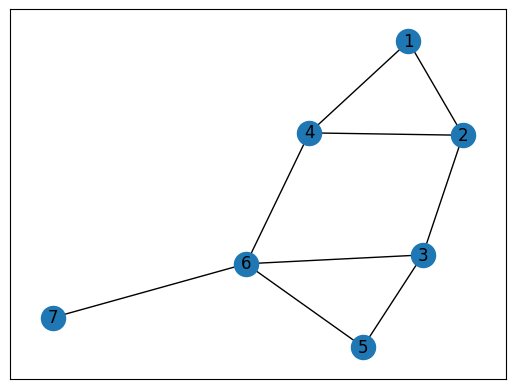

In [14]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4,5,6,7])

G.add_edge(1,4)
G.add_edge(1,2)
G.add_edge(2,4)
G.add_edge(2,3)
G.add_edge(3,5)
G.add_edge(3,6)
G.add_edge(4,6)
G.add_edge(5,6)
G.add_edge(6,7)

nx.draw_networkx(G)